In [1]:
'''importing the required libraries'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
#plt.style.use('bmh')

In [2]:
df =  pd.read_csv("paysim.csv")

print(len(df))

FileNotFoundError: [Errno 2] No such file or directory: 'paysim.csv'

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954408 entries, 0 to 1954407
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 164.0+ MB


In [ ]:
df=df.dropna()

In [ ]:
'''Checking for any null values'''
print('Null Values =',df.isnull().values.any())

Null Values = False


In [ ]:
'''removing the unwanted features'''
df.drop('nameOrig', axis=1, inplace=True)
df.drop('nameDest', axis=1, inplace=True)
df.drop('isFlaggedFraud', axis=1, inplace=True)

isFraud
0.0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1.0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

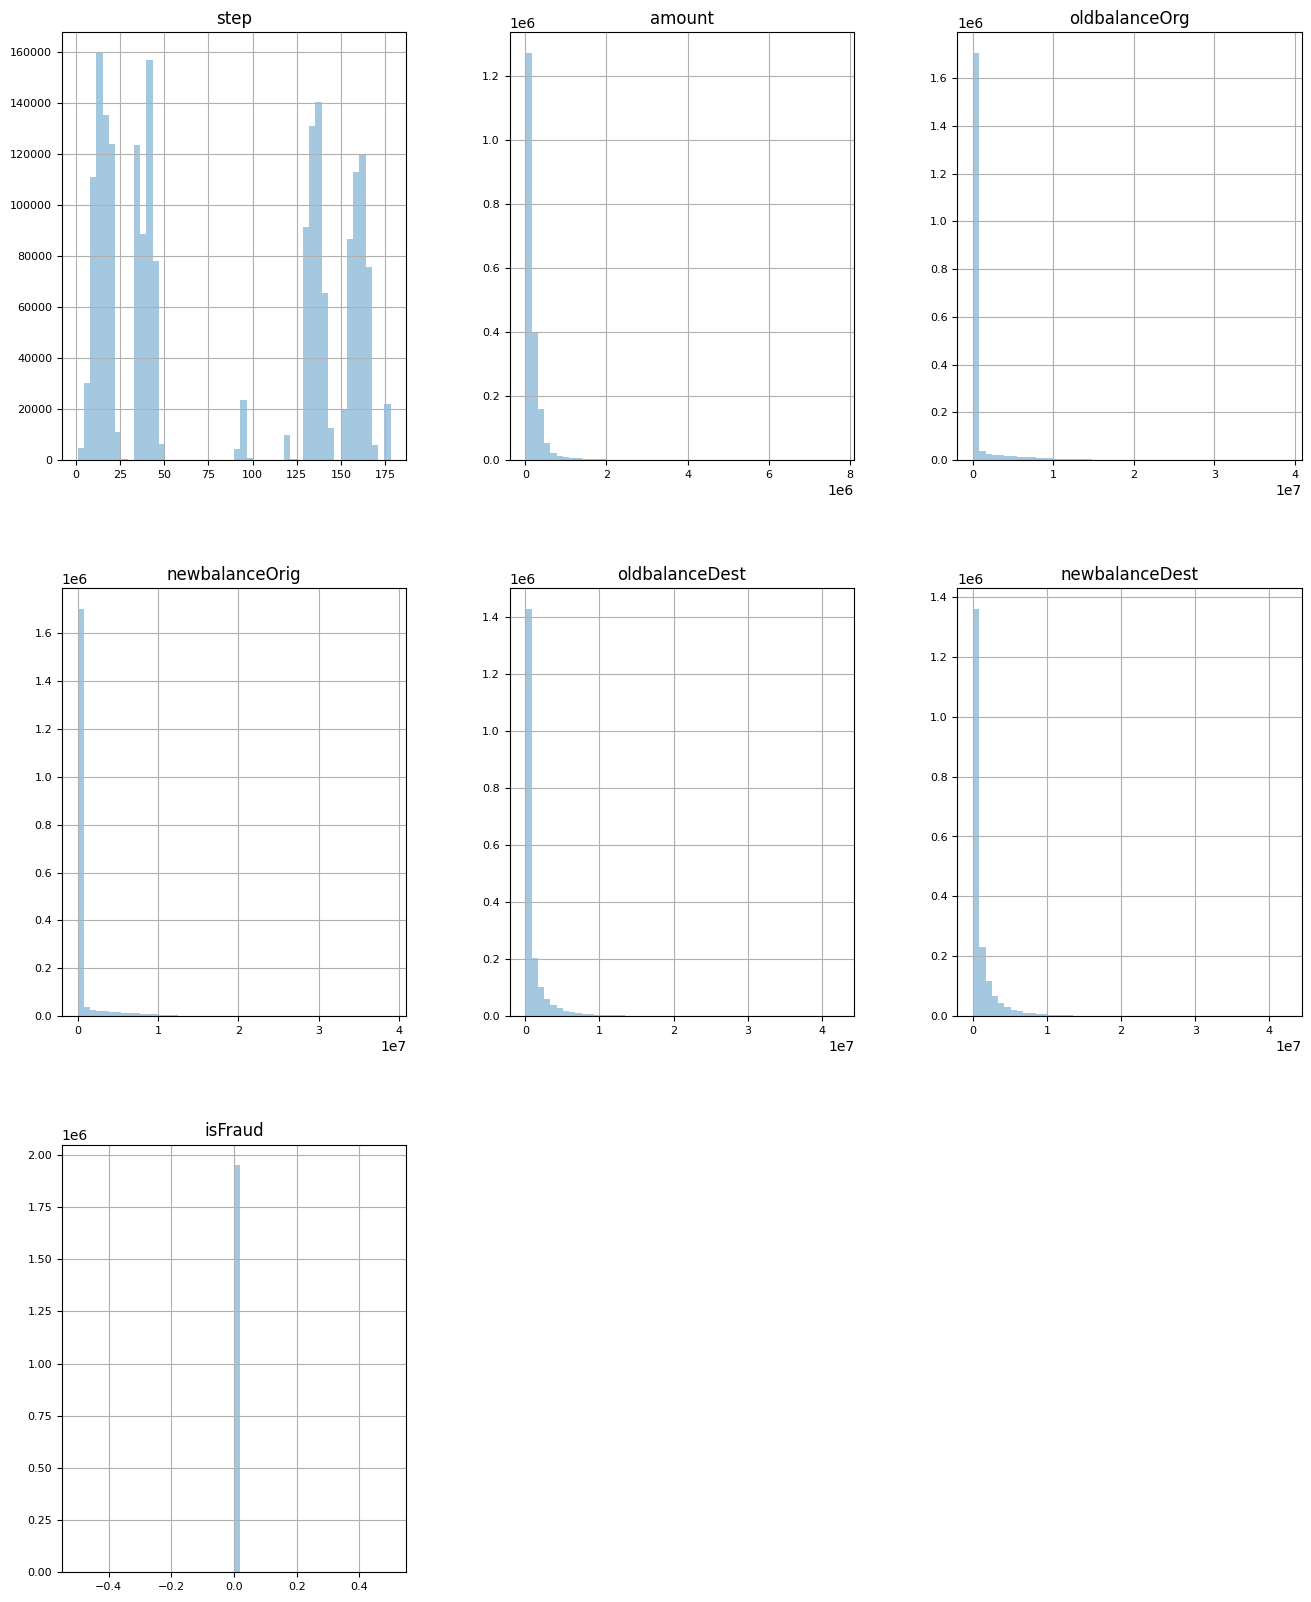

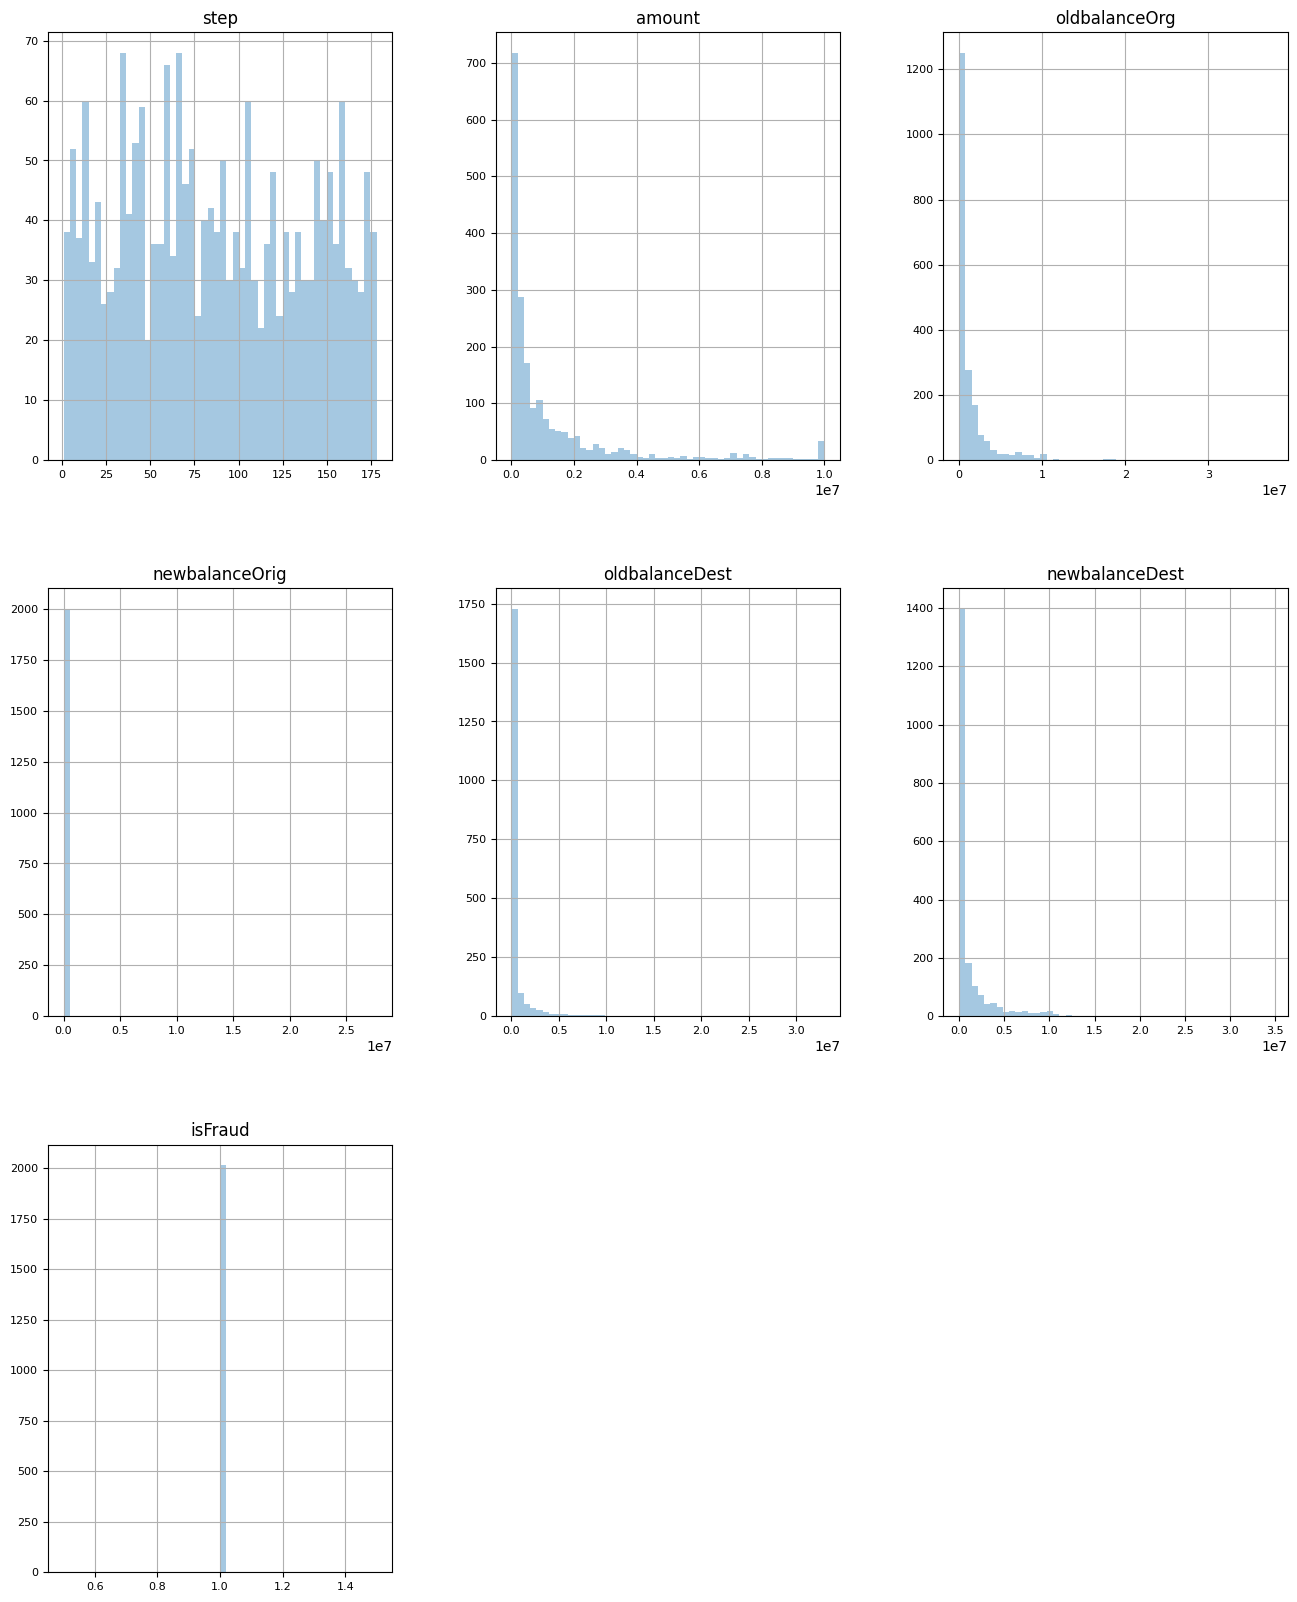

In [ ]:
''' Visualising the variables by grouping them by class '''
df.groupby('isFraud').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)

<Axes: title={'center': 'Correlation Matrix'}>

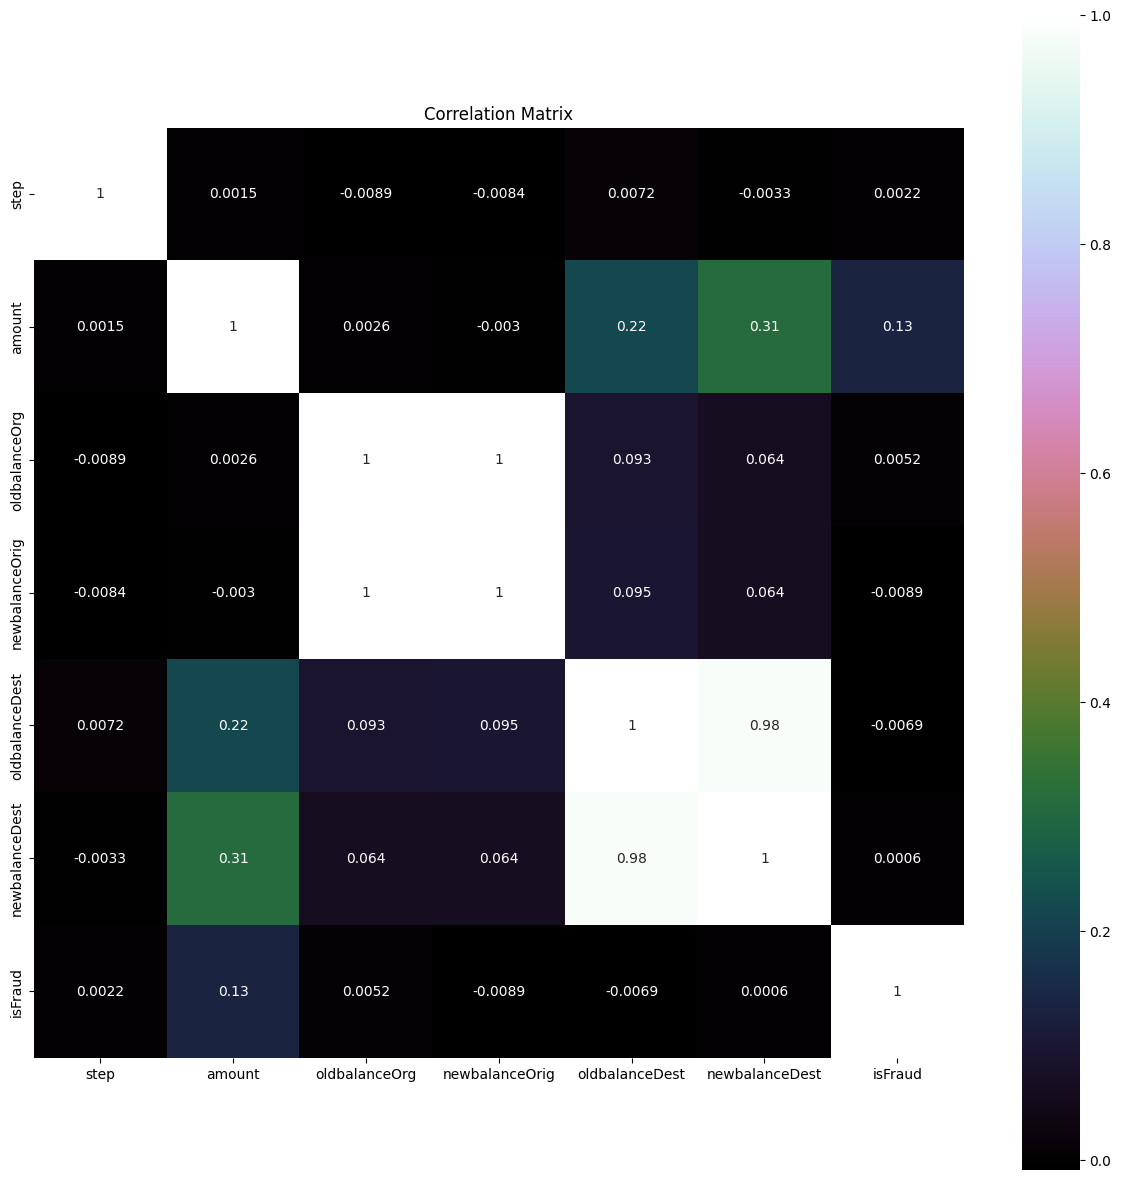

In [ ]:
''' co-relation matrix to check multicolinearity between variables '''

correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [ ]:
#creating dummy variables for categorical values
dum = pd.get_dummies(df['type'])
df1 = pd.concat([df,dum],axis=1)
df1.drop(['type'],axis=1, inplace=True)

0.0    19974
1.0       26
Name: isFraud, dtype: int64
Before OverSampling, counts of label '1': 17
Before OverSampling, counts of label '0': 13983 

After OverSampling, the shape of train_X: (20974, 11)
After OverSampling, the shape of train_y: (20974,) 

After OverSampling, counts of label '1': 6991
After OverSampling, counts of label '0': 13983


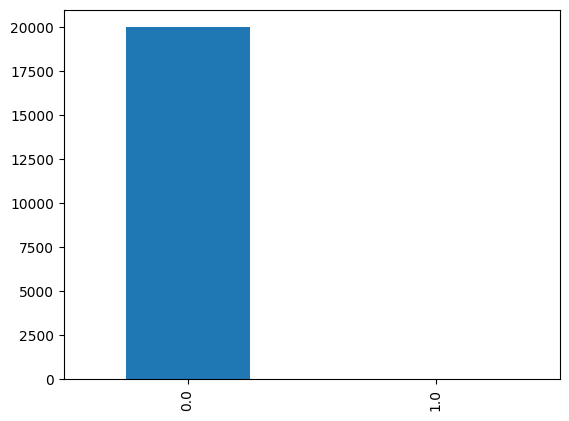

In [ ]:
'''checking if target class is balanced or not'''

df2 = df1.sample(n=20000)
df2.isFraud.value_counts().plot.bar()
print(df2.isFraud.value_counts())

'''Splitting the data into training and test'''

X_train, X_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

'''resampling the training data'''

sm = SMOTE(random_state=10, sampling_strategy=0.5)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
print(df.head())

   step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0      0.0  
1             0.0      0.0  
2             0.0      1.0  
3             0.0      1.0  
4             0.0      0.0  


In [ ]:
print(len(df2))

20000


In [ ]:

''' Feature scaling '''

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_res)
x_test_scaled = sc.transform(X_test)



In [ ]:
print(df2.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  20000.000000  2.000000e+04   2.000000e+04    2.000000e+04   
mean      82.105150  1.653398e+05   8.444255e+05    8.658819e+05   
std       61.981115  2.726917e+05   2.881696e+06    2.919614e+06   
min        1.000000  2.700000e-01   0.000000e+00    0.000000e+00   
25%       19.000000  1.348118e+04   0.000000e+00    0.000000e+00   
50%       44.000000  8.081826e+04   1.509250e+04    0.000000e+00   
75%      140.000000  2.237597e+05   1.203085e+05    1.608463e+05   
max      178.000000  7.246962e+06   3.175536e+07    3.178688e+07   

       oldbalanceDest  newbalanceDest       isFraud       CASH_IN  \
count    2.000000e+04    2.000000e+04  20000.000000  20000.000000   
mean     1.004221e+06    1.128288e+06      0.001300      0.218450   
std      2.371845e+06    2.473484e+06      0.036033      0.413205   
min      0.000000e+00    0.000000e+00      0.000000      0.000000   
25%      0.000000e+00    0.000000e+00     

In [ ]:
''' Initializing the model '''

model = Sequential()

''' Adding the input layer and the first hidden layer '''
model.add(Dense(units=64, activation='relu', input_shape=(11,)))
# model.add(Dense(input_dim=11, output_dim = 6, init = 'uniform', activation = 'relu'))

''' Adding the second hidden layer '''
model.add(Dense(units=10, activation='relu'))

# model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

''' Adding the output layer '''
model.add(Dense(units=1, activation='sigmoid'))

# model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

In [ ]:
''' Compiling and fitting the model '''

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model_info = model.fit(x_train_scaled, y_train_res, batch_size = 10, epochs = 2)
model.fit(x_train_scaled, y_train_res, batch_size = 10, epochs = 2)

Epoch 1/2
2098/2098 [==============================] - 9s 4ms/step - loss: 0.0077 - accuracy: 0.9977
Epoch 2/2
2098/2098 [==============================] - 8s 4ms/step - loss: 0.0077 - accuracy: 0.9978


In [ ]:
# Save the model to a file
model.save('my_model.h5')

In [ ]:
# model_info.history

{'loss': [0.008678795769810677, 0.00940131489187479],
 'accuracy': [0.9973300099372864, 0.9971870183944702]}

In [ ]:
# evaluate the keras model- training accuracy
loss, accuracy = model.evaluate(x_train_scaled, y_train_res)
print('Accuracy: %.2f' % (accuracy*100))

656/656 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9981
Accuracy: 99.81


In [ ]:
# evaluate the keras model -testing accuraccy
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Accuracy: %.2f' % (accuracy*100))

188/188 [==============================] - 1s 4ms/step - loss: 0.0239 - accuracy: 0.9950
Accuracy: 99.50


In [ ]:
predictions = model.predict(x_test_scaled)

# Print the predictions
print(predictions)

188/188 [==============================] - 0s 2ms/step
[[0.0000000e+00]
 [2.2494095e-25]
 [1.4930324e-17]
 ...
 [4.9711984e-01]
 [1.4572122e-24]
 [1.5914607e-24]]


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have ground truth labels y_test and predicted labels y_pred

# Convert predicted probabilities to class labels
y_pred_classes = (predictions > 0.5).astype('int')  # Assuming binary classification with a threshold of 0.5

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_classes)```````````````````````````````````````````

# Print accuracy
print("Accuracy:", accuracy*100)

Accuracy: 99.5


In [ ]:
''' Predicting the test results '''

y_pred = model.predict(x_test_scaled)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

188/188 [==============================] - 0s 2ms/step


In [ ]:
print(max(y_pred),min(y_pred))

[1.] [0.]


In [ ]:
# round predictions
rounded = [round(x[0]) for x in y_pred]

In [ ]:
_, accuracy = accuracy(y_pred, y_test)
print('Accuracy: %.2f' % (accuracy*100))

AttributeError: 'Sequential' object has no attribute 'accuracy'

Using Random Forest Classifier

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')


In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
'''removing the unwanted features'''
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('isFlaggedFraud', axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'payment' is a categorical column in your DataFrame
type_data = data['type']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the payment data
type_encoded = label_encoder.fit_transform(type_data)

# Replace the original 'payment' column with the encoded values
data['type_encoded'] = type_encoded


In [7]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encoded
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,3
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,3
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,4
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,3


In [8]:
'''Checking for any null values'''
print('Null Values =',data.isnull().values.any())

Null Values = False


In [9]:
data=data.dropna()
'''Checking for any null values'''
print('Null Values =',data.isnull().values.any())

Null Values = False


In [11]:
type_removed=data.drop('type',axis=1)

In [12]:

# Preprocess data
# Feature engineering, data cleaning, normalization, etc.

# Split data into features and labels
X = type_removed.drop('isFraud', axis=1)
y = data['isFraud']
print(X)

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  type_encoded  
0                  0.00             3  
1      

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize and train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:



# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
from joblib import dump

# Assuming 'model' is your trained model object
# Save the model to a file
dump(model, 'rf_trained_model.joblib')


['rf_trained_model.joblib']